<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/Classwork/ite'sMLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
RealEstate = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")

In [ ]:
RealEstate.head()

In [ ]:
RealEstate.tail()

In [ ]:
RealEstate.info()

In [ ]:
RealEstate.plot('house_age', 'house_price_unit_area', kind="scatter");

In [ ]:
RealEstate.plot("convenience_stores", "house_price_unit_area", kind="scatter");

Multiple Linear Regression

In [15]:
features=RealEstate[["house_age","convenience_stores"]]
target=RealEstate["house_price_unit_area"]

In [ ]:
features.shape

In [ ]:
target.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [22]:
mlr=LinearRegression()

In [23]:
mlr.fit(features, target)

LinearRegression()

In [ ]:
print ("r^2 of the model={0:1f}%".format(mlr.score(features, target)*100))

In [ ]:
mlr.intercept_

In [27]:
mlr.coef_

array([-0.28601262,  2.69251293])

In [28]:
RealEstate["prediction"]=mlr.predict(features)

In [ ]:
RealEstate.head()

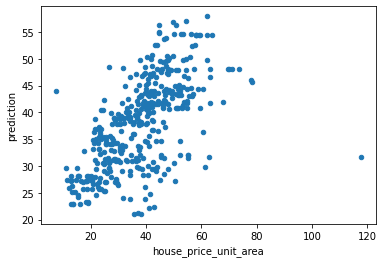

In [30]:
RealEstate.plot("house_price_unit_area", "prediction", kind="scatter");

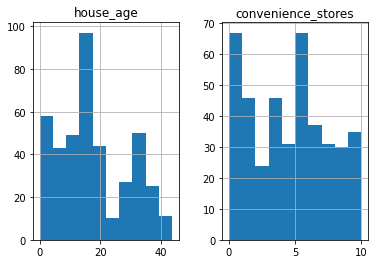

In [36]:
features.hist();

**standardization**

In [ ]:
#standardization
#array_s=(array-mean)/standard_deviation

In [38]:
features_s=(features-features.mean())/features.std()
target_s=(target-target.mean())/target.std()

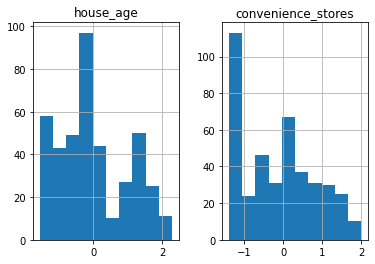

In [39]:
features_s.hist();

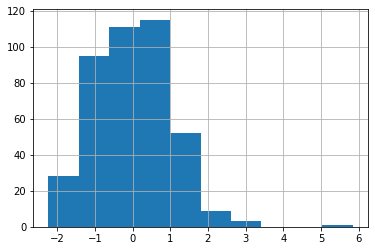

In [40]:
target_s.hist();

In [41]:
mlr_s=LinearRegression()

In [42]:
mlr_s.fit(features_s, target_s)

LinearRegression()

In [43]:
mlr.score(features,target)

0.3832531624493465

In [44]:
mlr_s.score(features_s, target_s)

0.3832531624493465

In [45]:
mlr.coef_

array([-0.28601262,  2.69251293])

In [46]:
mlr_s.coef_

array([-0.23947358,  0.58288101])

***min max normalization
array_n= (arrray-min) /(max-min)***

***statsmodels***

In [47]:
import statsmodels.formula.api as smf

In [50]:
df=features_s
df["target"]=target_s

In [ ]:
df.head()

In [52]:
model=smf.ols(formula='target~ house_age +convenience_stores',data=df)

In [55]:
results=model.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           7.36e-44
Time:                        20:36:13   Log-Likelihood:                -486.90
No. Observations:                 414   AIC:                             979.8
Df Residuals:                     411   BIC:                             991.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.119e-16      0

In [57]:
mlr.intercept_

32.02251473732663